In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn

In [2]:
#Setup Geometry
map_factor = 10
map_size = np.array([0, 1, 0, 1])*map_factor
building1_x = np.array([.5, .5, 1, 1, 0.5])*map_factor
building1_y = np.array([.4, .6, .6, .4, 0.4])*map_factor
building2_x = np.array([0, 0, .25, .25, 0])*map_factor
building2_y = np.array([0, 1, 1, 0, 0])*map_factor
building1 = np.array([building1_x, building1_y])
building2 = np.array([building2_x, building2_y])
building_storage = np.array([building1, building2])
building_number = 2
building_height = np.ones(5,)*map_factor

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


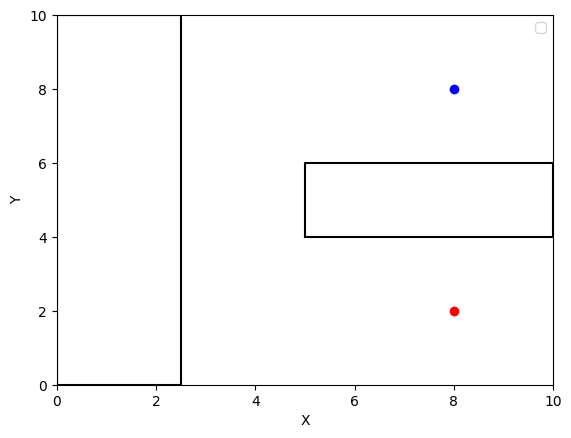

In [3]:
ax = plt.figure().add_subplot()
ax.plot(building1_x, building1_y, '-k')
ax.plot(building2_x, building2_y, '-k')

x0 = np.array([8, 2, 5])
xf = np.array([8, 8, 5])
ax.plot(x0[0], x0[1], 'or')
ax.plot(xf[0], xf[1], 'ob')

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, map_size[1])
ax.set_ylim(0, map_size[3])
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
#ax.view_init(elev=40., azim=40, roll=0)

plt.show()

In [4]:
# Initial Variables
x0 = np.array([8, 2, 5])
xf = np.array([8, 8, 5])
repeat = True
t_range = 0.5

In [5]:
# Sensor Setup
from Camera3D import Camera

# Camera Dictionary
cam_dict = {}
cam_dict['pos_init'] = np.array([0,0,10])
cam_dict['ang_init'] = np.array([np.pi/4, np.pi/4])

cam_dict['spec'] = {}
cam_dict['spec']['ang_limit'] = np.array([0, np.pi/2])
cam_dict['spec']['FOV'] = np.deg2rad(90)
cam_dict['spec']['range'] = 10
cam_dict['spec']['cam_time'] = np.array([10, 1])

# Build Camera
sensor_number = 1
sensor = {}

for nc in range(sensor_number):
    sensor[str(nc)] = Camera(cam_dict)

In [6]:
# Vehicle Variables
yawinit = np.deg2rad(180)
pitchinit = np.deg2rad(0)
yawrate = np.deg2rad(45)
pitchrate = np.deg2rad(30)
velocity = 5

In [7]:
# Storage
Tree = {}
Tree['x0'] = {}
Tree['x0']['Position'] = x0
Tree['x0']['Yaw'] = yawinit
Tree['x0']['Pitch'] = pitchinit
Tree['x0']['Time'] = 0
Tree['x0']['Time Cost'] = 0
Tree['x0']['Dist Cost'] = 0
Tree['x0']['Child'] = []

Node: 8, 2, 5
Counter: 1
Random time: 0.2776115718124922
Random Sample
Node: 7.871670971742256, 1.8743820488575627, 3.6236074647971015, 224.38834722033545, 277.433389136073
Closest Node: x0
Distance: 6.1269620223118775
Counter: 2
Random time: 0.3630080071003007
Random Sample
Node: 7.841428872095776, 2.1609295068212955, 1.8315845017140964, 96.02467001487037, 279.1343908417372
Closest Node: x1
Distance: 5.841223247481217
Counter: 3
Random time: 0.2680035002265318
Random Sample
Node: 7.177443743383639, 2.3648103860105776, 0.6856337002867627, 342.93056100646413, 238.7791835230209
Closest Node: x2
Distance: 5.694906564721934
Counter: 4
Random time: 0.22263855390298787
Random Sample
Random Sample
Node: 7.592505065848688, 2.928407998343822, 1.5512432959279916, 233.6302206160665, 128.95938919949052
Closest Node: x2
Distance: 5.087936472934966
Counter: 5
Random time: 0.4022867965991006
Random Sample
Random Sample
Random Sample
Random Sample
Node: 7.890389308982889, 3.3366065242002496, 3.4981653

KeyError: 'x667'

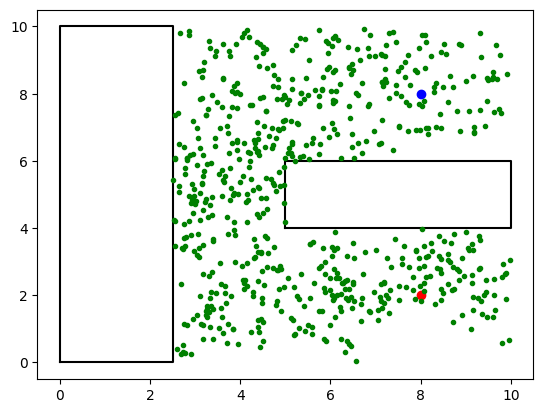

In [8]:
xprev = x0
yawhist = []
pitchhist = []
yawprev = yawinit
pitchprev = pitchinit
counter = 1
tprev = 0

yawhist.append(yawprev)
pitchhist.append(pitchprev)

print('Node: '+ str(x0[0]) + ', ' + str(x0[1]) + ', ' + str(x0[2]))
while repeat:
    print('=================================')
    print('Counter: '+ str(counter))
    # set probability
    sample = np.array([.9, 0.1])

    # Vehicle Sample Domain
    rn_t = rn.uniform(0.1, t_range)
    print('Random time: '+str(rn_t))
    #rn_t = t_range

    # Randomly sample X1
    rn_select = rn.uniform(.8, .2)
    nextNode = True
    node_counter = 0
    node_counter_tol = 10
    while nextNode:
        if rn_select >= 0 and rn_select < sample[0]:
            print('Random Sample')
            # Sample in polar and convert back to Cartesian
            rn_r = rn.uniform(0, velocity*rn_t)

            # Check sampling
            """print(np.rad2deg(yawprev + rn.uniform(-yawrate*rn_t, yawrate*rn_t)))
            print(np.rad2deg(rn.uniform(yawprev-yawrate*rn_t, yawprev+yawrate*rn_t)))

            adfadfafd"""
            rn_yaw = rn.uniform(0, 2*np.pi)#yawprev + rn.uniform(-yawrate*rn_t, yawrate*rn_t)
            rn_pitch = rn.uniform(0, 2*np.pi)#pitchprev + rn.uniform(-pitchrate*rn_t, pitchrate*rn_t)

            R = velocity*rn_t
            rn_x = xprev[0] + R*np.cos(rn_pitch)*np.cos(rn_yaw)
            rn_y = xprev[1] + R*np.cos(rn_pitch)*np.sin(rn_yaw)
            rn_z = xprev[2] + R*np.sin(rn_pitch)

            yawcurr = rn_yaw
            pitchcurr = rn_pitch
        elif rn_select >= sample[0] and rn_select <= (sample[0] + sample[1]):
            print('To Final')
            dx = xf - x0
            yawcurr = np.arctan2(dx[1], dx[0])
            pitchcurr = np.arctan2(dx[2], np.sqrt(dx[1]**2+dx[0]**2))
            normvec = (xf-x0)/np.linalg.norm(xf-x0, 2)
            R = velocity*rn_t
            travel = R*normvec
            rn_x = xprev[0] + travel[0]
            rn_y = xprev[1] + travel[1]
            rn_z = xprev[2] + travel[2]
        node_counter += 1
        
        # Check if vehicle's position is valid in parallel (return 1 when valid)
        # Check1: check if it is still in map
        # check2: check if it is in any building
        # check3: check if it is in FOV of sensors
        check_vec = np.zeros(1+building_number+sensor_number,)

        # Check 1
        if(rn_x >= map_size[0] and rn_x <= map_size[1]) and (rn_y >= map_size[2] and rn_y <= map_size[3]) and (rn_z >= 0 and rn_z <= 10):
            check_vec[0] = 1
        else:
            check_vec[0] = 0

        # Check 2
        for nb in range (building_number):
            building_i = building_storage[nb]
            building_ix = building_i[0]
            building_iy = building_i[1]

        # Repeat checking for building overlap
            check_vec[1+nb] = bool(not (rn_x >= building_ix[0] and rn_x <= building_ix[2])&(rn_y >= building_iy[0] and rn_y <= building_iy[2]))

        # Check 3
        """for nc in range(sensor_number):
            pan_instance1 = sensor[str(nc)].get_pan_instance(tprev + rn_t)
            conex = sensor[str(nc)].get_state()[0:3]
            conedir = sensor[str(nc)].get_direction_vec(cam_dict['ang_init'][0], cam_dict['ang_init'][1])
            p = np.array([rn_x, rn_y, rn_z])
            cone_dist = np.dot(p-conex, conedir)
            if cone_dist >= 0 and cone_dist <= sensor[str(nc)].get_h():
                cone_radius = (cone_dist / sensor[str(nc)].get_h())*sensor[str(nc)].get_radius()
                orth_dist = np.linalg.norm((p-conex)-cone_dist*conedir)
                if orth_dist < cone_radius:
                    check_vec[1+building_number+nc] = 0
                else:
                    check_vec[1+building_number+nc] = 1"""

        if node_counter > node_counter_tol:
            print('cannot find node')
            rn_x = x0[0]
            rn_y = x0[1]
            rn_z = x0[2]
            yawcurr = yawinit
            pitchcurr = pitchinit
            rn_t = 0
            break

        if sum(check_vec) == 1+building_number: # + sensor_number:
            nextNode = False
            break
        else:
            nextNode = True
    print('Node: '+ str(rn_x) + ', ' + str(rn_y) + ', ' + str(rn_z) + ', ' + str(np.rad2deg(yawcurr)) + ', ' + str(np.rad2deg(pitchcurr)))
    x1 = np.array([rn_x, rn_y, rn_z])

    yawhist.append(yawcurr)
    pitchhist.append(pitchcurr)

    # Find closest node
    dist_storage = []
    for i in range(counter):
        node_name_to_check = 'x'+str(i)
        dx = x1 - Tree[node_name_to_check]['Position']
        dist = np.sqrt((dx[0])**2 + (dx[1])**2 + (dx[2])**2)
        dist_storage.append(dist)
    #print(dist_storage)
    min_dist_ind = np.where(dist_storage == min(dist_storage))
    prev_node_name = 'x'+str(min_dist_ind[0][0])
    print('Closest Node: ' + str(prev_node_name))

    # Log Child Node
    curr_node_name = 'x'+str(counter)
    Tree[curr_node_name] = {}
    Tree[curr_node_name]['Parent'] = str(prev_node_name)
    Tree[curr_node_name]['Child'] = []
    Tree[curr_node_name]['Position'] = x1
    Tree[curr_node_name]['Yaw'] = yawcurr
    Tree[curr_node_name]['Pitch'] = pitchcurr
    Tree[curr_node_name]['Time'] = tprev + rn_t
    Tree[curr_node_name]['Time Cost'] = Tree[prev_node_name]['Time Cost'] + rn_t
    dxTree = Tree[curr_node_name]['Position'] - x1
    Tree[curr_node_name]['Dist Cost'] = Tree[prev_node_name]['Dist Cost'] + np.sqrt(dxTree[0]**2+dxTree[1]**2+dxTree[2]**2)

    Tree[prev_node_name]['Child'].append(curr_node_name)

    # Choose node closest to final point
    dist_storage = []
    for i in range(counter):
        node_name_to_check = 'x'+str(i)
        dx = xf - Tree[node_name_to_check]['Position']
        dist = np.sqrt((dx[0])**2 + (dx[1])**2)
        dist_storage.append(dist)
    min_dist_ind = np.where(dist_storage == min(dist_storage))
    closest_node_name = 'x'+str(min_dist_ind[0][0])

    xprev = x1
    yawprev = yawcurr
    pitchprev = pitchcurr

    # Check for destination
    tol = 0.25
    dist_diff = x1 - xf
    dist = np.sqrt(dist_diff[0]**2+dist_diff[1]**2)
    print('Distance: ' + str(dist))

    if dist <= tol:
        # Direct towards final point
        dx = xf - x0
        yawcurr = np.arctan2(dx[1], dx[0])
        pitchcurr = np.arctan2(dx[2], np.sqrt(dx[1]**2+dx[0]**2))
        Tree['xf'] = {}
        Tree['xf']['Position'] = xf
        Tree['xf']['Yaw'] = yawcurr
        Tree['xf']['Pitch'] = pitchcurr
        Tree['xf']['Time'] = Tree[curr_node_name]['Time'] + np.sqrt(dx[0]**2 + dx[0]**2 + dx[0]**2)/velocity
        Tree['xf']['Time Cost'] = Tree[curr_node_name]['Time Cost'] + np.sqrt(dx[0]**2 + dx[0]**2 + dx[0]**2)/velocity
        Tree['xf']['Dist Cost'] = Tree[curr_node_name]['Dist Cost'] + np.sqrt(dx[0]**2 + dx[0]**2 + dx[0]**2)
        repeat = False

        ax = plt.figure().add_subplot()
        ax.plot(building1_x, building1_y, '-k')
        ax.plot(building2_x, building2_y, '-k')

        # Plot init/fin
        ax.plot(x0[0], x0[1], 'or')
        ax.plot(xf[0], xf[1], 'ob')
        print(Tree)

        numkey = len(Tree)
        print(numkey)

        for i in range(numkey-1):
            node = 'x'+str(i+1)
            prevnode = 'x'+str(i)
            # Plot nodes
            ax.plot(Tree[node]['Position'][0], Tree[node]['Position'][1], '.g')
            #ax.plot([Tree[prevnode]['Position'][0], Tree[node]['Position'][0]], [Tree[prevnode]['Position'][1], Tree[node]['Position'][1]], '-g')

        # Make legend, set axes limits and labels
        ax.legend()
        ax.set_xlim(0, map_size[1])
        ax.set_ylim(0, map_size[3])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
    else:
        repeat = True

    if counter == 1000:
        ax = plt.figure().add_subplot()
        ax.plot(building1_x, building1_y, '-k')
        ax.plot(building2_x, building2_y, '-k')

        # Plot init/fin
        ax.plot(x0[0], x0[1], 'or')
        ax.plot(xf[0], xf[1], 'ob')
        #print(Tree['x0'])

        numkey = len(Tree)

        for i in range(numkey-1):
            node = 'x'+str(i+1)
            prevnode = 'x'+str(i)
            # Plot nodes
            ax.plot(Tree[node]['Position'][0], Tree[node]['Position'][1], '.g')
            #ax.plot([Tree[prevnode]['Position'][0], Tree[node]['Position'][0]], [Tree[prevnode]['Position'][1], Tree[node]['Position'][1]], '-g')

        # Make legend, set axes limits and labels
        ax.legend()
        ax.set_xlim(0, map_size[1])
        ax.set_ylim(0, map_size[3])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')

        # Customize the view angle so it's easier to see that the scatter points lie
        # on the plane y=0

        plt.show()
        adfadsfaf

    counter += 1
print('Destination Reached')

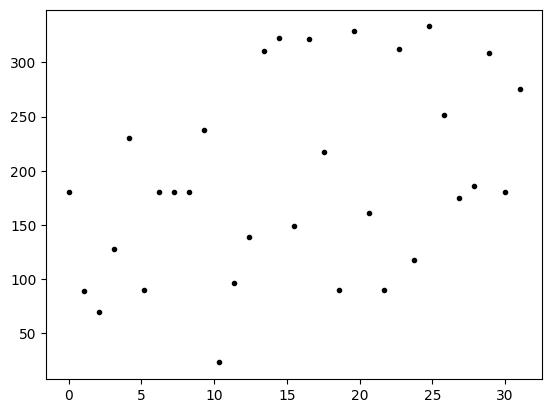

In [ ]:
ax = plt.figure().add_subplot()
ax.plot(np.linspace(0, len(yawhist), len(yawhist)), np.rad2deg(yawhist), '.k')
plt.show()

In [ ]:
print(Tree['x0'])
print(Tree['x6'])
print(Tree['x9'])
print(Tree['x10'])



{'Position': array([8, 2, 5]), 'Yaw': 3.141592653589793, 'Pitch': 0.0, 'Time': 0, 'Time Cost': 0, 'Dist Cost': 0, 'Child': ['x1', 'x6', 'x7', 'x8', 'x9', 'x22', 'x29']}
{'Parent': 'x0', 'Child': [], 'Position': array([8, 2, 5]), 'Yaw': 3.141592653589793, 'Pitch': 0.0, 'Time': 0.23762517534866065, 'Time Cost': 0.23762517534866065, 'Dist Cost': 0.0}
{'Parent': 'x0', 'Child': ['x10'], 'Position': array([ 5.47250474, -2.02802936,  4.01417911]), 'Yaw': 4.152010526836827, 'Pitch': 6.0787726020443795, 'Time': 0.48564488748221735, 'Time Cost': 0.48564488748221735, 'Dist Cost': 0.0}
{'Parent': 'x9', 'Child': ['x11'], 'Position': array([ 7.67833528, -1.07926636,  0.66318506]), 'Yaw': 0.40619595052235397, 'Pitch': 5.334148309506245, 'Time': 0.41224993267908216, 'Time Cost': 0.8978948201612995, 'Dist Cost': 0.0}


In [ ]:
#Node: 7.309933195184824, 4.585668005014259, 5.194109312906388, 138.57240065794903, 8.766829565683842

rn_x = 8
rn_y = 5
rn_z = 5
check_vec = np.zeros(1+building_number+sensor_number,)

# Check 1
if (rn_x >= map_size[0] and rn_x <= map_size[1]) and (rn_y >= map_size[2] and rn_y <= map_size[3]) and (rn_z >= 0 and rn_z <= 10) :
    check_vec[0] = 1
else:
    check_vec[0] = 0

# Check 2
for nb in range (building_number):
    building_i = building_storage[nb]
    building_ix = building_i[0]
    building_iy = building_i[1]

   # Repeat checking for building overlap
    check_vec[1+nb] = bool(not (rn_x >= building_ix[0] and rn_x <= building_ix[2])&(rn_y >= building_iy[0] and rn_y <= building_iy[2]))

# Check 3
for nc in range(sensor_number):
    pan_instance1 = sensor[str(nc)].get_pan_instance(5)
    conex = sensor[str(nc)].get_state()[0:3]
    conedir = sensor[str(nc)].get_direction_vec(cam_dict['ang_init'][0], cam_dict['ang_init'][1])
    p = np.array([rn_x, rn_y, rn_z])
    cone_dist = np.dot(p-conex, conedir)
    if cone_dist >= 0 and cone_dist <= sensor[str(nc)].get_h():
        cone_radius = (cone_dist / sensor[str(nc)].get_h())*sensor[str(nc)].get_radius()
        orth_dist = np.linalg.norm((p-conex)-cone_dist*conedir)
        if orth_dist < cone_radius:
            check_vec[1+building_number+nc] = 0
        else:
            check_vec[1+building_number+nc] = 1

print(check_vec)

[1. 0. 1. 0.]


KeyError: 'Parent'

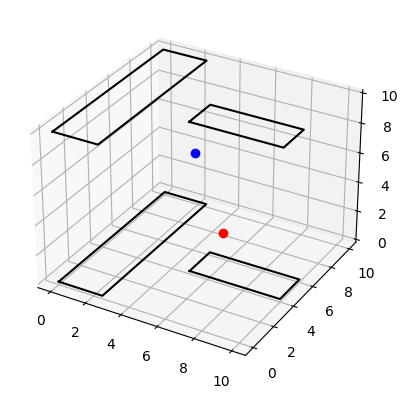

In [ ]:
# Plot RRT
ax = plt.figure().add_subplot(projection='3d')
ax.plot(building1_x, building1_y, np.array([0, 0, 0, 0, 0]), '-k')
ax.plot(building1_x, building1_y, building_height, '-k')

ax.plot(building2_x, building2_y, np.array([0, 0, 0, 0, 0]), '-k')
ax.plot(building2_x, building2_y, building_height, '-k')

# Plot init/fin
ax.plot(x0[0], x0[1], x0[2], 'or')
ax.plot(xf[0], xf[1], xf[2], 'ob')

# Plot nodes
currparent = Tree['xf']['Parent']
TreeKey = Tree.keys()
numkey = len(TreeKey)

path_repeat = True
counter = 1
while path_repeat:
    for i in range(numkey-1):
        currkey = list(TreeKey)[i+1]
        parent = Tree[currkey]
        if currparent == currkey:
            parent_pos = parent['Position']
            ax.plot(parent_pos[0], parent_pos[1], parent_pos[2], 'og')
            currparent = parent['Parent']
            break
    counter += 1

    # Check if x0 reached
    if currparent == 'x0':
        path_repeat = False

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, map_size[1])
ax.set_ylim(0, map_size[3])
ax.set_zlim(0, map_factor)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=40., azim=40, roll=0)

plt.show()

In [ ]:
# Trace back the route
# 1. Measure size of the dictionary
# 2. From final point, get its parent